In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/0408_data.zip'

-rw------- 1 root root 19653256 Apr  9 05:05 '/content/drive/My Drive/Colab Notebooks/datasets/0408_data.zip'


In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/0408_data.zip

In [ ]:
train_dir = '0408_data/data/train'
test_dir = '0408_data/data/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(train_dir,target_size = (640, 640),
                                                    batch_size = 40,class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir,target_size = (640, 640),
                                                    batch_size = 40,class_mode = 'binary')

Found 163 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (640, 640, 3))

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':       
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

conv_base.summary()

In [ ]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))   

model.summary()


model.compile(loss = 'binary_crossentropy', 
              optimizer = optimizers.Adam(lr = 0.000005),
              metrics = ['accuracy'])

In [ ]:
%%time

Hist = model.fit(train_generator, steps_per_epoch = 4, epochs = 10, validation_data = test_generator)

Epoch 1/10
4/4 [==============================] - 71s 5s/step - loss: 0.7475 - accuracy: 0.5546 - val_loss: 0.6108 - val_accuracy: 0.7500
Epoch 2/10
4/4 [==============================] - 9s 2s/step - loss: 0.6046 - accuracy: 0.6430 - val_loss: 0.5395 - val_accuracy: 0.8500
Epoch 3/10
4/4 [==============================] - 9s 3s/step - loss: 0.4545 - accuracy: 0.7496 - val_loss: 0.4850 - val_accuracy: 0.9000
Epoch 4/10
4/4 [==============================] - 8s 3s/step - loss: 0.3460 - accuracy: 0.8473 - val_loss: 0.4454 - val_accuracy: 0.9250
Epoch 5/10
4/4 [==============================] - 10s 3s/step - loss: 0.3280 - accuracy: 0.8658 - val_loss: 0.4054 - val_accuracy: 0.8500
Epoch 6/10
4/4 [==============================] - 9s 2s/step - loss: 0.2497 - accuracy: 0.9572 - val_loss: 0.3906 - val_accuracy: 0.8500
Epoch 7/10
4/4 [==============================] - 9s 2s/step - loss: 0.1986 - accuracy: 0.9737 - val_loss: 0.3829 - val_accuracy: 0.8500
Epoch 8/10
4/4 [=======================

In [ ]:
loss, accuracy = model.evaluate(test_generator)
loss, accuracy

1/1 [==============================] - 2s 2s/step - loss: 0.2631 - accuracy: 0.8750


(0.2630543112754822, 0.875)

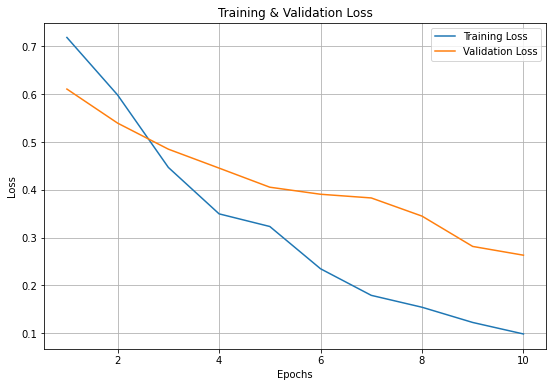

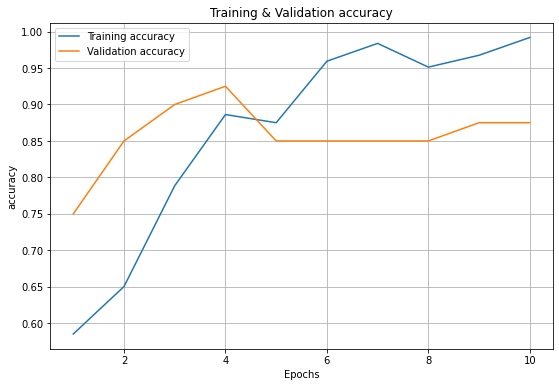

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])

plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_step = test_generator.samples // test_generator.batch_size

predictions = model.predict_generator(test_generator)
predicted_class = np.argmax(predictions, axis=1)

# true_class = test_generator.classes
# class_labels = list(test_generator.class_indices.keys())

# conf = confusion_matrix(true_class, predicted_class)

# print(conf)

print(len(predicted_class))
print(predicted_class)
print(predictions[:5])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


40
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[[0.9203261 ]
 [0.01013009]
 [0.18772998]
 [0.11003952]
 [0.02517812]]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

for t in test_generator:
  # (images, labels)
  # ((20,640,640,3) / 20)
  pred = [round(p[0]) for p in model.predict(t[0])]
  print(accuracy_score(t[1],pred))
  print(confusion_matrix(t[1], pred))
  break

0.875
[[18  2]
 [ 3 17]]


In [ ]:
import pathlib
from glob import glob

data_root = pathlib.Path(glob('/content/0408_data/data/*/')[1])
print(data_root)
# label = ['0','1']

/content/0408_data/data/test


In [ ]:
!ls /content/0408_data/data

test  train


In [ ]:
import random

all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]

image_count = len(all_image_paths)
print('image_count:', image_count)

image_count: 40


In [ ]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2

all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
print(all_image_paths)
print(all_image_paths[0].split('/')[-2])
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
print('image_count:', image_count)

def softmax(x):
  m = np.max(x)
  sm = np.exp(x-m)/np.sum(np.exp(x-m))
  return sm

plt.figure(figsize=(12,12))
for n in range(12):
  image_path = random.choice(all_image_paths)
  plt.subplot(4,3, n+1)
  plt.imshow(plt.imread(image_path))
  
  img = cv2.imread(image_path)
  #img= cv2.resize(img, dsize=(640,640))
  img = img/255.0
  img = np.expand_dims(img, axis=0)

  logits = model.predict(img)[0]
  prediction = softmax(logits)
  #print(prediction)
  a = prediction.tolist()
  a = sorted(a, reverse=True)
  # top = prediction.argsort()[::-1]
  # labels = [label[index] for index in top]
  # idx = int(image_path.split('/')[-2])
  plt.title(a)
  plt.axis('off')
plt.show()

In [ ]:
import cv2

plt.figure(figsize=((16, 25)))

def softmax(x):
    m = np.max(x)
    sm = np.exp(x - m)/np.sum(np.exp(x - m))
    return sm
  
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

for n in range(15):
    #랜덤 이미지 경로 추출
    image_path = random.choice(all_image_paths)

    #이미지 크기 변경 및 정규화
    img = cv2.imread(image_path)
    # img = cv2.resize(img, dsize=(224, 224))
    img = img / 255.0  # 3차원 행렬(224, 224, 3)
    img = np.expand_dims(img, axis=0)  # 4차원 (1, 224, 224, 3)

    # 이미지 분류
    logits = model.predict(img)[0]
    # prediction = softmax(logits)
    # arr = prediction.astype(np.int)
    # arr = prediction[0]

    #이미지 출력
    plt.subplot(5,3, n+1)
    plt.imshow(plt.imread(image_path))
    idx = image_path.split('/')[-2]
    plt.title('label: ' + str(idx))
    plt.xlabel(str(logits))
    #plt.xlabel(confusion_matrix(img, model.predict))
    # plt.xlabel(arr)



# label없는 데이터로 테스트

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/models/pre_check_model.h5')

In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/project_test_image.zip

In [ ]:
from keras.models import load_model

model_call = load_model('/content/drive/My Drive/Colab Notebooks/models/pre_check_model.h5')

In [ ]:
import pathlib
from glob import glob

data_roots = pathlib.Path(glob('/content/*/')[3])
print(data_roots)

/content/best


In [ ]:
!ls /content/best

전신샷390.jpg  전신샷447.jpg  전신샷508.jpg  전신샷646.jpg  전신샷711.jpg
전신샷402.jpg  전신샷475.jpg  전신샷518.jpg  전신샷649.jpg  전신샷722.jpg
전신샷414.jpg  전신샷476.jpg  전신샷522.jpg  전신샷650.jpg  전신샷745.jpg
스타일418.jpg  전신샷481.jpg  전신샷539.jpg  전신샷666.jpg  전신샷748.jpg
전신샷425.jpg  전신샷483.jpg  전신샷624.jpg  전신샷672.jpg  전신샷764.jpg
전신샷428.jpg  전신샷490.jpg  전신샷626.jpg  전신샷679.jpg
전신샷443.jpg  전신샷499.jpg  전신샷627.jpg  전신샷683.jpg


In [ ]:
import random

all_paths = list(data_roots.glob('*'))
print(all_paths)
all_paths = [str(path) for path in all_paths]

image_count = len(all_paths)
print('image_count:', image_count)

[PosixPath('/content/best/전신샷539.jpg'), PosixPath('/content/best/전신샷443.jpg'), PosixPath('/content/best/전신샷764.jpg'), PosixPath('/content/best/전신샷490.jpg'), PosixPath('/content/best/전신샷483.jpg'), PosixPath('/content/best/전신샷672.jpg'), PosixPath('/content/best/전신샷649.jpg'), PosixPath('/content/best/전신샷481.jpg'), PosixPath('/content/best/전신샷499.jpg'), PosixPath('/content/best/전신샷428.jpg'), PosixPath('/content/best/전신샷522.jpg'), PosixPath('/content/best/전신샷745.jpg'), PosixPath('/content/best/전신샷475.jpg'), PosixPath('/content/best/전신샷508.jpg'), PosixPath('/content/best/전신샷624.jpg'), PosixPath('/content/best/전신샷683.jpg'), PosixPath('/content/best/전신샷748.jpg'), PosixPath('/content/best/전신샷518.jpg'), PosixPath('/content/best/전신샷476.jpg'), PosixPath('/content/best/전신샷627.jpg'), PosixPath('/content/best/전신샷722.jpg'), PosixPath('/content/best/전신샷646.jpg'), PosixPath('/content/best/전신샷447.jpg'), PosixPath('/content/best/전신샷711.jpg'), PosixPath('/content/best/전신샷402.jpg'), PosixPath('/content/best

In [ ]:
import cv2

plt.figure(figsize=((16, 25)))

def softmax(x):
    m = np.max(x)
    sm = np.exp(x - m)/np.sum(np.exp(x - m))
    return sm

for n in range(15):
    #랜덤 이미지 경로 추출
    image_path = random.choice(all_paths)

    #이미지 크기 변경 및 정규화
    img = cv2.imread(image_path)
    # img = cv2.resize(img, dsize=(224, 224))
    img = img / 255.0  # 3차원 행렬(224, 224, 3)
    img = np.expand_dims(img, axis=0)  # 4차원 (1, 224, 224, 3)

    # 이미지 분류
    logits = model_call.predict(img)[0]
    # prediction = softmax(logits)
    # arr = prediction.astype(np.int)
    # arr = prediction[0]

    #이미지 출력
    plt.subplot(5,3, n+1)
    plt.imshow(plt.imread(image_path))
    idx = image_path.split('/')[-2]
    plt.title('label: ' + str(idx))
    plt.xlabel(str(logits))
    #plt.xlabel(confusion_matrix(img, model.predict))
    # plt.xlabel(arr)

